# Hands-on Image Processing with Python

## Chapter 10: Deep Learning Models in Image Processing

**Author: Sandipan Dey**

In this chapter, we shall discuss recent advances in image processing with deep learning. We'll start by differentiating between classical and deep learning techniques, followed by a conceptual section on convolutional neural networks (CNN), the deep neural net architectures particularly useful for image processing. Then we'll continue our discussion on the image classification problem with a couple of image datasets and how to implement it with TensorFlow and Keras, two very popular deep learning libraries. Also, we'll see how to train deep CNN architectures and use them for predictions. 

The topics to be covered in this chapter are as follows:

- Deep learning in image processing
- CNNs
- Image classification with TensorFlow or Keras with the handwritten digits images dataset
- Some popular deep CNNs (VGG-16/19, InceptionNet, ResNet) with an application in classifying the cats versus dogs images with the VGG-16 network

### Deep learning in image processing                                                   

The main goal of **Machine Learning (ML)** is **generalization**; that is, we train an algorithm on a training dataset and we want the algorithm to work with high performance (accuracy) on an unseen dataset. In order to solve a complex image processing task (such as image classification), the more training data we have, we may expect better generalization—ability of the ML model learned, provided we have taken care of overfitting (for example, with regularization). But with traditional ML techniques, not only does it become computationally very expensive with huge training data, but also, the learning (improvement in generalization) often stops at a certain point. Also, the traditional ML algorithms often need lots of domain expertise and human intervention and they are only capable of what they are designed for—nothing more and nothing less. This is where deep learning models are very promising

### What is deep learning?                                                  

Some of the well-known and widely accepted definitions of deep learning are as follows:
- It is a subset of ML.
- It uses a cascade of multiple layers of (non-linear) processing units, called an artificial neural network (ANN), and algorithms inspired by the structure and function of the brain (neurons). Each successive layer uses the output from the previous layer as input.
- It uses ANN for feature extraction and transformation, to process data, find patterns, and develop abstractions.It can be supervised (for example, classification) or unsupervised (for example, pattern analysis).
- It uses gradient-descent algorithms to learn multiple levels of representations that correspond to different levels of abstraction and the levels form a hierarchy of concepts.
- It achieves great power and flexibility by learning to represent the world as a nested hierarchy of concepts, with each concept defined in relation to simpler concepts, and more abstract representations computed in terms of less abstract ones.


For example, for an image classification problem, a deep learning model learns the image classes in an incremental manner using its hidden layer architecture. 


First, it automatically extracts low-level features such as identifying light or dark regions, and then it extracts high-level features such as edges. Later, it extracts the highest-level features, such as shapes, so that they can be classified. 


Every node or neuron represents a small aspect of the whole image. When put together, they depict the whole image. They are capable of representing the image fully. Moreover, every node and every neuron in the network is assigned weights. These weights represent the actual weight of the neuron with respect to the strength of its relationship with the output. These weights can be adjusted while the models are developed

### Classical versus deep learning                                                        
- Handcrafted versus automated feature extraction: In order to solve image processing problems with traditional ML techniques, the most important preprocessing step is the handcrafted feature (for example, HOG and SIFT) extraction in order to reduce the complexity of an image and make patterns more visible for learning algorithms to work. The biggest advantage of deep learning algorithms is that they try to learn low-level and high-level features from training images in an incremental manner. This eliminates the need for handcrafted feature in extraction or engineering.
- By parts versus end-to-end solution: Traditional ML techniques solve the problem statement by breaking down the problem, solving different parts first, and then aggregating the results finally to give output, whereas deep learning techniques solve the problem using an end-to-end approach. For example, in an object detection problem, classical ML algorithms such as SVM require a bounding box object detection algorithm that will first identify all of the possible objects that will need to have HOG as input to the ML algorithm in order to recognize correct objects. But a deep learning method, such as the YOLO network, takes the image as input and provides the location and name of the object as output. Clearly end-to-end, isn't it?
- Training time and advanced hardware: Unlike traditional ML algorithms, deep learning algorithms take a long time to get trained because of the huge number of parameters and relatively huge datasets. Hence, we should always train a deep learning model on high-end hardware such as GPUs and remember to train for a reasonable time, as time is a very important aspect in training the models effectively.
- Adaptable and transferable: Classical ML techniques are quite restrictive, whereas deep learning techniques can be applied to a wide range of applications and various domains. A big share of it goes to the transfer learning that allows us to use pre-trained deep networks for different applications within the same domains. For example, here, in image processing, pre-trained image classification networks are generally used as a feature extraction frontend to detect objects and segmentation networks

Let's now see the differences between a ML and a deep learning model when used in image classification diagrammatically (cat versus dog images).

Traditional ML will have feature extraction and a classifier to give a solution to any problem
<img src="../images/ch-10-1.png" >
With deep learning, you can see the hidden layers that we talked about and the decision making in action
<img src="../images/ch-10-2.png" >

### Why deep learning?                                                        
As discussed earlier, if you have more data, the best choice would be deep networks that perform much better with ample data. Many a time, the more data used, the more accurate the result. The classical ML method needs a complex set of ML algorithms and more data is only going to hamper its accuracy. Complex methods then need to be applied to make up for the less accuracy. Moreover, even learning is affected—it is almost stopped at some point in time when more training data is added to train the model.
This is how this can be depicted graphically
<img src="../images/ch-10-3.png" >

### CNNs                                                        
CNNs are deep neural networks for which the primarily used input is images. CNNs learn the filters (features) that are hand-engineered in traditional algorithms. This independence from prior knowledge and human effort in feature design is a major advantage. They also reduce the number of parameters to be learned with their shared-weights architecture and possess translation invariance characteristics. In the next subsection, we'll discuss the general architecture of a CNN and how it works

### Conv or pooling or FC layers – CNN architecture and how it works                                                        
The next screenshot shows the typical architecture of a CNN. It consists of one or more convolutional layer, followed by a nonlinear ReLU activation layer, a pooling layer, and, finally, one (or more) fully connected (FC) layer, followed by an FC softmax layer, for example, in the case of a CNN designed to solve an image classification problem.There can be multiple convolution ReLU pooling sequences of layers in the network, making the neural network deeper and useful for solving complex image processing tasks, as seen in the following diagram
<img src="../images/ch-10-4.png" >
The next few sections describe each of the layers and how they work.

### Convolutional layer                                                        

The main building block of CNN is the convolutional layer. The convolutional layer consists of a bunch of convolution filters (kernels), which we already discussed in detail in Chapter 2, Sampling, Fourier Transform, and Convolution. The convolution is applied on the input image using a convolution filter to produce a feature map. On the left side is the input to the convolutional layer; for example, the input image. On the right is the convolution filter, also called the kernel. As usual, the convolution operation is performed by sliding this filter over the input. At every location, the sum of element-wise matrix multiplication goes into the feature map. A convolutional layer is represented by its width, height (the size of a filter is width x height), and depth (number of filters). Stride specifies how much the convolution filter will be moved at each step (the default value is 1). Padding refers to the layers of zeros to surround the input (generally used to keep the input and output image size the same, also known as same padding). The following screenshot shows how 3 x 3 x 3 convolution filters are applied on an RGB image, the first with valid padding and the second with the computation with two such filters with the size of the stride=padding=1
<img src="../images/ch-10-5.png" >

### Pooling layer                                                        
After a convolution operation, a pooling operation is generally performed to reduce dimensionality and the number of parameters to be learned, which shortens the training time, requires less data to train, and combats overfitting. Pooling layers downsample each feature map independently, reducing the height and width, but keeping the depth intact. The most common type of pooling is max pooling, which just takes the maximum value in the pooling window. Contrary to the convolution operation, pooling has no parameters. It slides a window over its input and simply takes the max value in the window. Similar to a convolution, the window size and stride for pooling can be specified.

### Non-linearity – ReLU layer                                                        
For any kind of neural network to be powerful, it needs to contain non-linearity. The result of the convolution operation is hence passed through the non-linear activation function. ReLU activation is used in general to achieve non-linearity (and to combat the vanishing gradient problem with sigmoid activation). So, the values in the final feature maps are not actually the sums, but the relu function applied to them

### FC layer                                                        
After the convolutional and pooling layers, generally a couple of FC layers are added to wrap up the CNN architecture. The output of both convolutional and pooling layers are 3D volumes, but an FC layer expects a 1D vector of numbers. So, the output of the final pooling layer needs to be flattened to a vector, and that becomes the input to the FC layer. Flattening is simply arranging the 3D volume of numbers into a 1D vector

### Dropout                                                        
Dropout is the most popular regularization technique for deep neural networks. Dropout is used to prevent overfitting, and it is typically used to increase the performance (accuracy) of the deep learning task on the unseen dataset. During training time, at each iteration, a neuron is temporarily dropped or disabled with some probability, p. This means all the input and output to this neuron will be disabled at the current iteration. This hyperparameter p is called the dropout rate, and it's typically a number around 0.5, corresponding to 50% of the neurons being dropped out

### Image classification with TensorFlow or Keras                                                        
In this section, we shall revisit the problem of handwritten digits classification (with the MNIST dataset), but this time with deep neural networks. We are going to solve the problem using two very popular deep learning libraries, namely TensorFlow and Keras. TensorFlow (TF) is the most famous library used in production for deep learning models. It has a very large and awesome community. However, TensorFlow is not that easy to use. On the other hand, Keras is a high level API built on TensorFlow. It is more user-friendly and easy to use compared to TF, although it provides less control over low-level structures. Low-level libraries provide more flexibility. Hence TF can be tweaked much more as compared to Keras

### Classification of MNIST using FC network with TF
First, we shall start with a very simple deep neural network, one containing only a single FC hidden layer (with ReLU activation) and a softmax FC layer, with no convolutional layer. The next screenshot shows the network upside down. The input is a flattened image containing 28 x 28 nodes and 1,024 nodes in the hidden layer and 10 output nodes, corresponding to each of the digits to be classified
<img src="../images/ch-10-6.png" >
Now let's implement the deep learning image classification with TF. First, we need to load the mnist dataset and divide the training images into two parts, the first one being the larger (we use 50k images) for training, and the second one (10k images) to be used for validation. Let's reformat the labels to represent the image classes with one-hot encoded binary vectors. Then the tensorflow graph needs to be initialized along with the variable, constant, and placeholder tensors. A mini-batch stochastic gradient descent (SGD) optimizer is to be used as the learning algorithm with a batch size of 256, to minimize the softmax cross-entropy logit loss function with L2 regularizers on the couple of weights layers (with hyperparameter values of λ1=λ2=1). Finally, the TensorFlow session object will be run for 6k steps (mini-batches) and the forward/backpropagation will be run to update the model (weights) learned, with subsequent evaluation of the model on the validation dataset. As can be seen, the accuracy obtained after the final batch completes is 96.5%

In [1]:
%matplotlib inline
import numpy as np
# import data
from keras.datasets import mnist
import tensorflow as tf

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

np.random.seed(0)
train_indices = np.random.choice(60000, 50000, replace=False)
valid_indices = [i for i in range(60000) if i not in train_indices]
X_valid, y_valid = X_train[valid_indices,:,:], y_train[valid_indices]
X_train, y_train = X_train[train_indices,:,:], y_train[train_indices]

print(X_train.shape, X_valid.shape, X_test.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 6s 1us/step
(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)


In [2]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 1 to [0.0, 1.0, 0.0 ...], 2 to [0.0, 0.0, 1.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
X_train, y_train = reformat(X_train, y_train)
X_valid, y_valid = reformat(X_valid, y_valid)
X_test, y_test = reformat(X_test, y_test)
print('Training set', X_train.shape, X_train.shape)
print('Validation set', X_valid.shape, X_valid.shape)
print('Test set', X_test.shape, X_test.shape)

Training set (50000, 784) (50000, 784)
Validation set (10000, 784) (10000, 784)
Test set (10000, 784) (10000, 784)


In [3]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [4]:
batch_size = 256 #128
num_hidden_units = 1024
lambda1 = 0.05 #0.005 #0.01
lambda2 = 0.05 #0.005 #0.01
    
graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, image_size * image_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(X_valid)
  tf_test_dataset = tf.constant(X_test)
  
  # Variables.
  weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, num_hidden_units]))
  biases1 = tf.Variable(tf.zeros([num_hidden_units]))

  # connect inputs to every hidden unit. Add bias
  layer_1_outputs = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)

  weights2 = tf.Variable(tf.truncated_normal([num_hidden_units, num_labels]))
  biases2 = tf.Variable(tf.zeros([num_labels]))  

  # Training computation.
  logits = tf.matmul(layer_1_outputs, weights2) + biases2
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits) + \
                        lambda1*tf.nn.l2_loss(weights1) + lambda2*tf.nn.l2_loss(weights2))  
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.003).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  layer_1_outputs = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
  valid_prediction = tf.nn.softmax(tf.matmul(layer_1_outputs, weights2) + biases2)
  layer_1_outputs = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
  test_prediction = tf.nn.softmax(tf.matmul(layer_1_outputs, weights2) + biases2)  

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Minibatch loss at step 0: 70188.093750
Minibatch accuracy: 11.3%
Validation accuracy: 40.2%


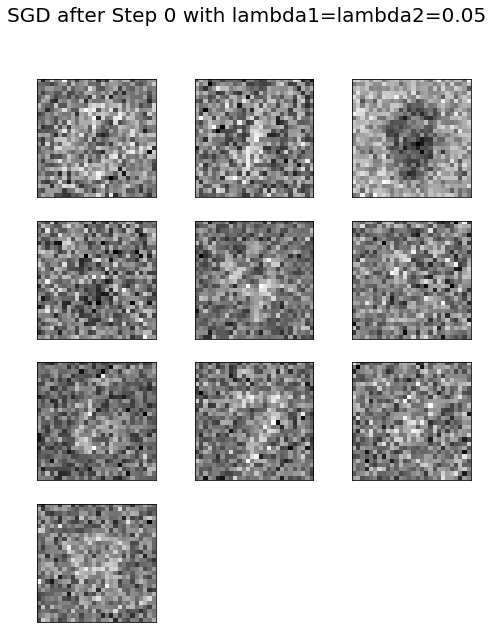

Minibatch loss at step 500: 13979.980469
Minibatch accuracy: 91.0%
Validation accuracy: 91.0%


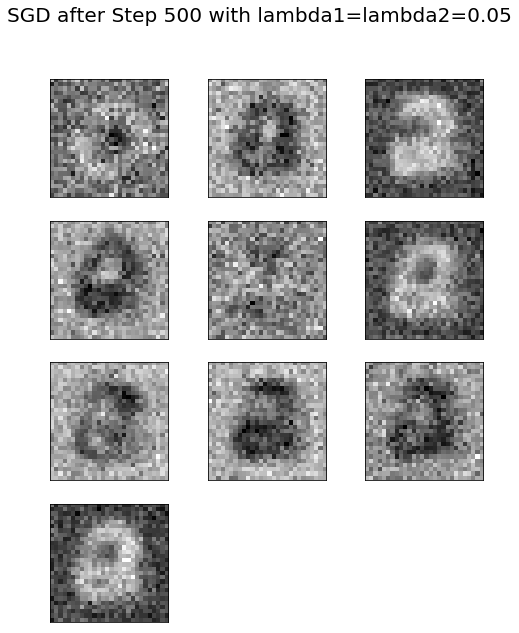

Minibatch loss at step 1000: 11922.359375
Minibatch accuracy: 94.9%
Validation accuracy: 91.2%


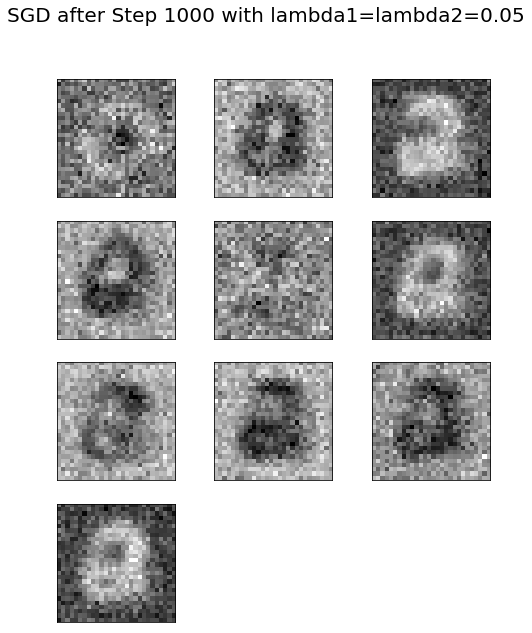

Minibatch loss at step 1500: 10250.417969
Minibatch accuracy: 98.0%
Validation accuracy: 91.8%


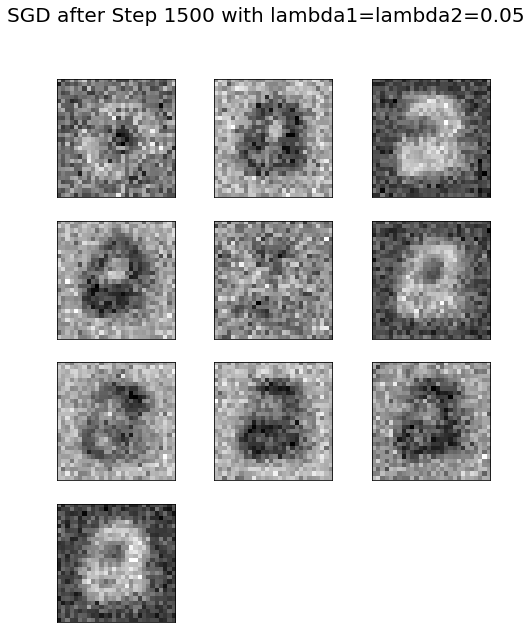

Minibatch loss at step 2000: 8818.380859
Minibatch accuracy: 98.0%
Validation accuracy: 91.7%


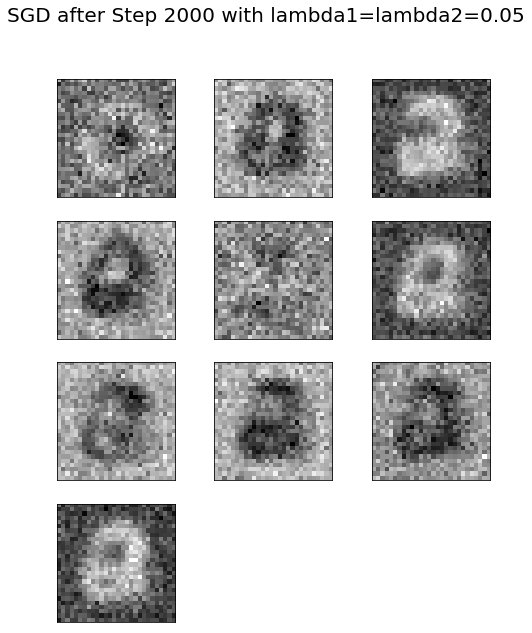

Minibatch loss at step 2500: 7589.846680
Minibatch accuracy: 98.8%
Validation accuracy: 91.9%


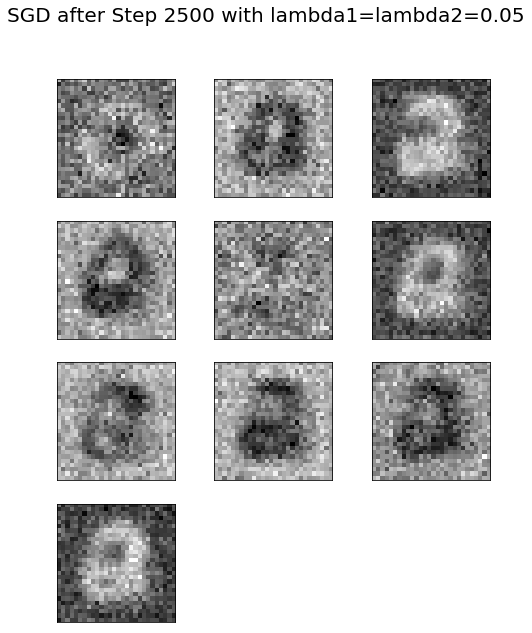

Minibatch loss at step 3000: 6532.196289
Minibatch accuracy: 98.0%
Validation accuracy: 91.7%


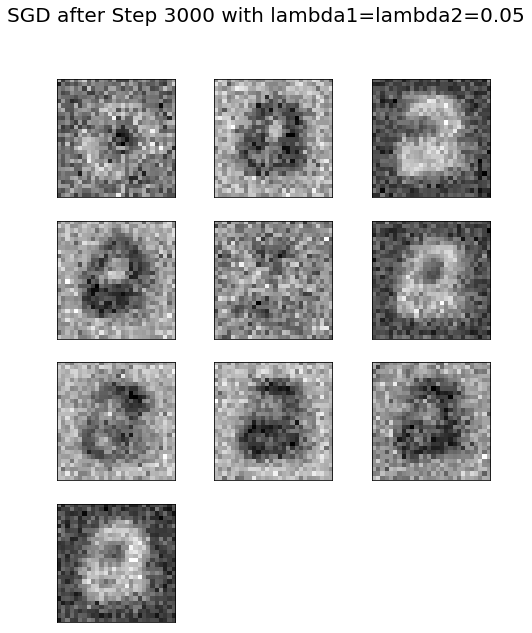

Minibatch loss at step 3500: 5623.300293
Minibatch accuracy: 99.6%
Validation accuracy: 91.7%


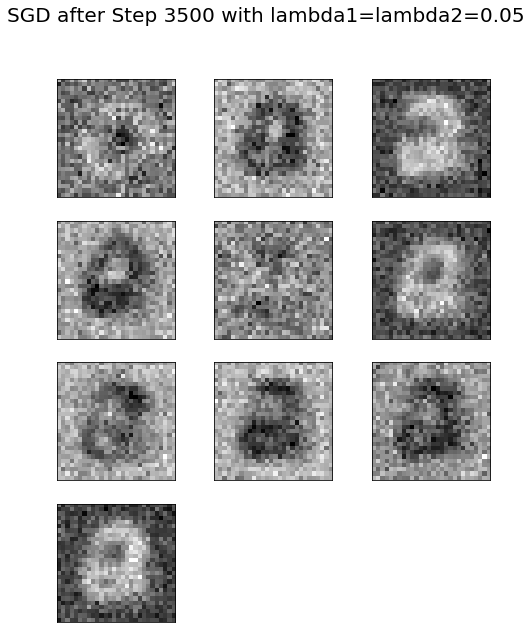

Minibatch loss at step 4000: 4838.726074
Minibatch accuracy: 98.8%
Validation accuracy: 91.8%


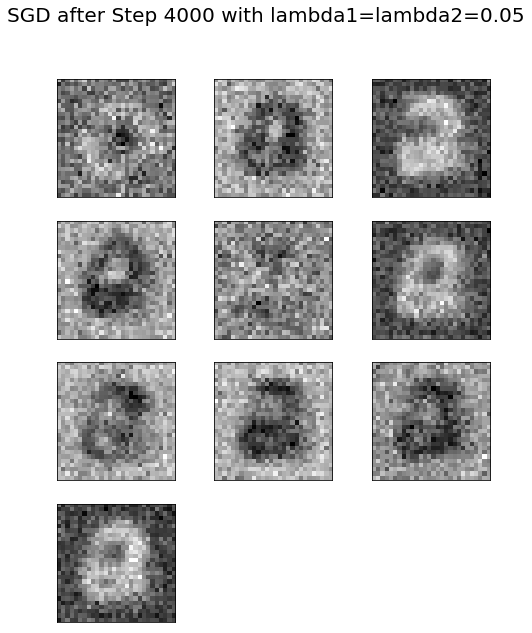

Minibatch loss at step 4500: 4164.259277
Minibatch accuracy: 98.8%
Validation accuracy: 91.9%


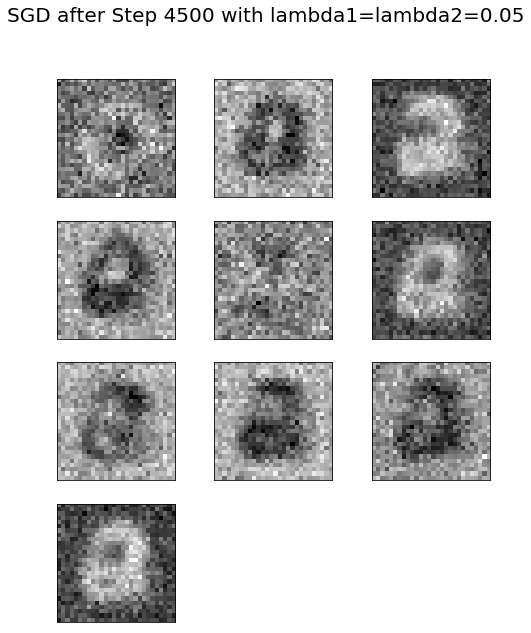

Minibatch loss at step 5000: 3584.074951
Minibatch accuracy: 99.2%
Validation accuracy: 92.0%


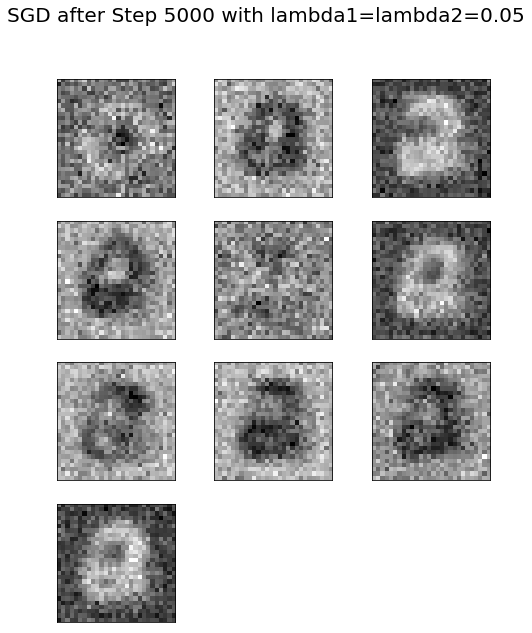

Minibatch loss at step 5500: 3085.011230
Minibatch accuracy: 99.6%
Validation accuracy: 91.9%


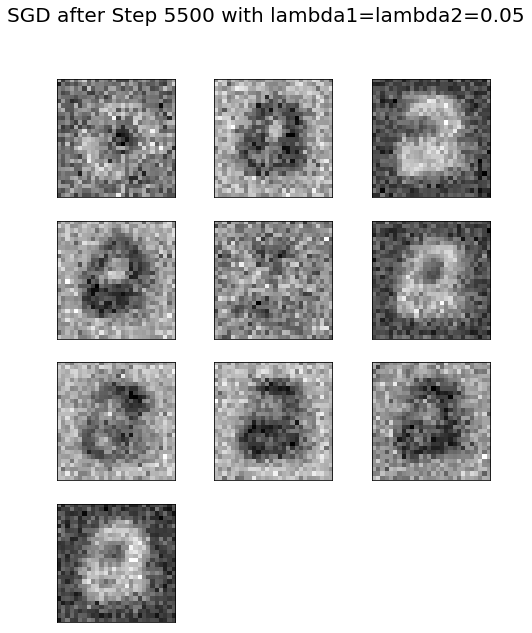

Minibatch loss at step 6000: 2655.112793
Minibatch accuracy: 99.6%
Validation accuracy: 91.7%


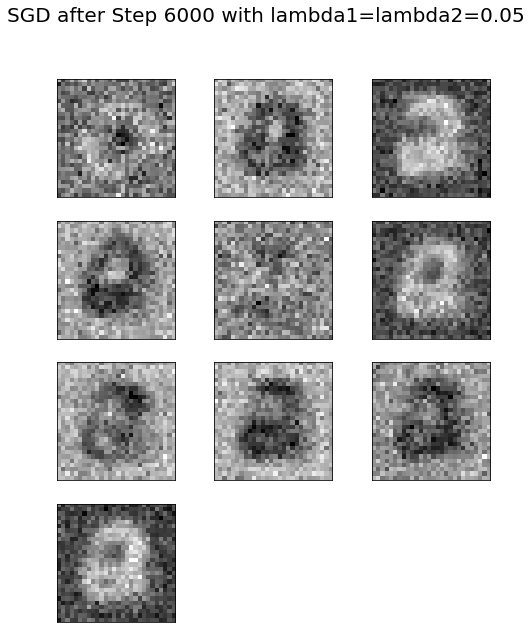

Test accuracy: 92.0%


In [5]:
num_steps = 6001

ll = []
atr = []
av = []

import matplotlib.pylab as plt

with tf.Session(graph=graph) as session:
  #tf.global_variables_initializer().run()
  session.run(tf.initialize_all_variables())
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (y_train.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = X_train[offset:(offset + batch_size), :]
    batch_labels = y_train[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      ll.append(l)
      a = accuracy(predictions, batch_labels)
      atr.append(a)
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % a)
      a = accuracy(valid_prediction.eval(), y_valid)
      av.append(a)
      print("Validation accuracy: %.1f%%" % a)
      #images = weights1.eval()
      images = weights1.eval() @ weights2.eval()
      plt.figure(figsize=(8,10))
      #indices = np.random.choice(num_hidden_units, 225)
      for j in range(10):
        #plt.subplot(15,15,j+1);plt.imshow(np.reshape(images[:,indices[j]], (image_size,image_size)), cmap='gray');
        plt.subplot(4,3,j+1);plt.imshow(np.reshape(images[:,j], (image_size,image_size)), cmap='gray');
        plt.xticks([],[]);plt.yticks([],[])
      plt.suptitle('SGD after Step ' + str(step) + ' with lambda1=lambda2=' + str(lambda1), size=20)
      #plt.tight_layout()
      plt.show()
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), y_test))


In [ ]:
images = weights1.eval()
pylab.figure(figsize=(18,18))
indices = np.random.choice(num_hidden_units, 225)
for j in range(225):
   pylab.subplot(15,15,j+1)
   pylab.imshow(np.reshape(images[:,indices[j]], (image_size,image_size)), cmap='gray')
   pylab.xticks([],[]), pylab.yticks([],[])
   pylab.subtitle('SGD after Step ' + str(step) + ' with lambda1=lambda2=' + str(lambda1))
pylab.show()

The preceding visualizes the weights learned for 225 (randomly chosen) hidden nodes in the FC layer 1 of the network after 4,000 steps. Observe that the weights are already learned some features from the input images the model was trained on

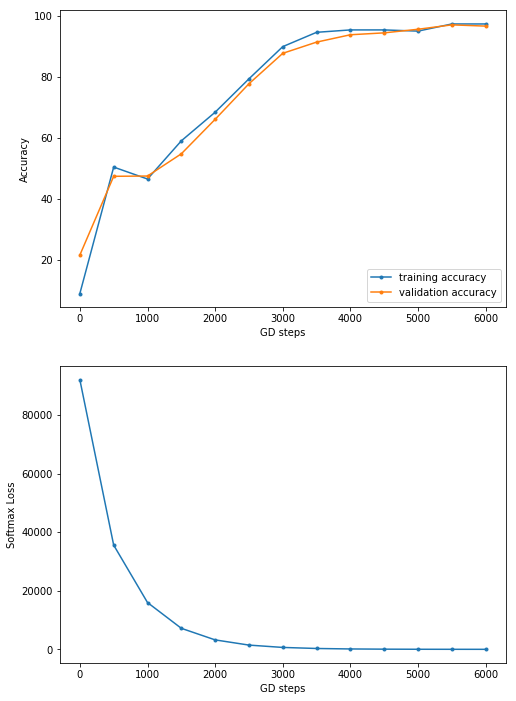

In [9]:
plt.figure(figsize=(8,12))
plt.subplot(211) 
plt.plot(range(0,6001,500), atr, '.-', label='training accuracy')
plt.plot(range(0,6001,500), av, '.-', label='validation accuracy')
plt.xlabel('GD steps')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(212) 
plt.plot(range(0,6001,500), ll, '.-')
plt.xlabel('GD steps')
plt.ylabel('Softmax Loss')
plt.show()

### Classification of MNIST using Convolutional neural network with Keras

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical

# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

# build the model
model = convolutional_model()
model.summary()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)    

In [4]:
# pip install pydot_ng ## install pydot_ng if not already installed
import pydot_ng as pydot
from keras.utils import plot_model
plot_model(model, to_file='../images/model.png')

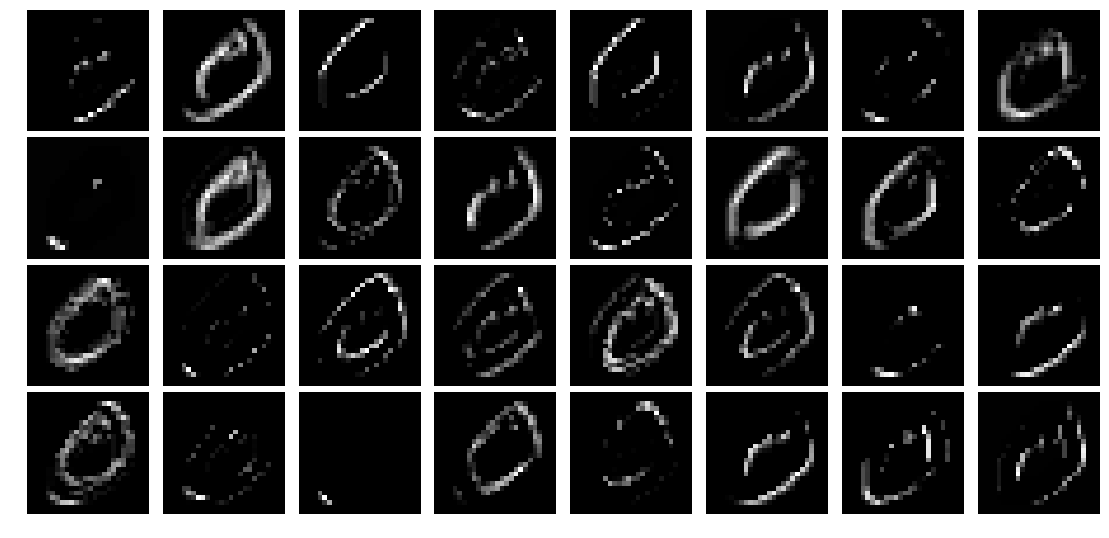

In [10]:
from keras.models import Model
import matplotlib.pylab as plt
import numpy as np

intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 1 
for c in range(32):
    plt.subplot(4, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

In [11]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

(?, 28, 28, 1) (60000, 24, 24, 64)


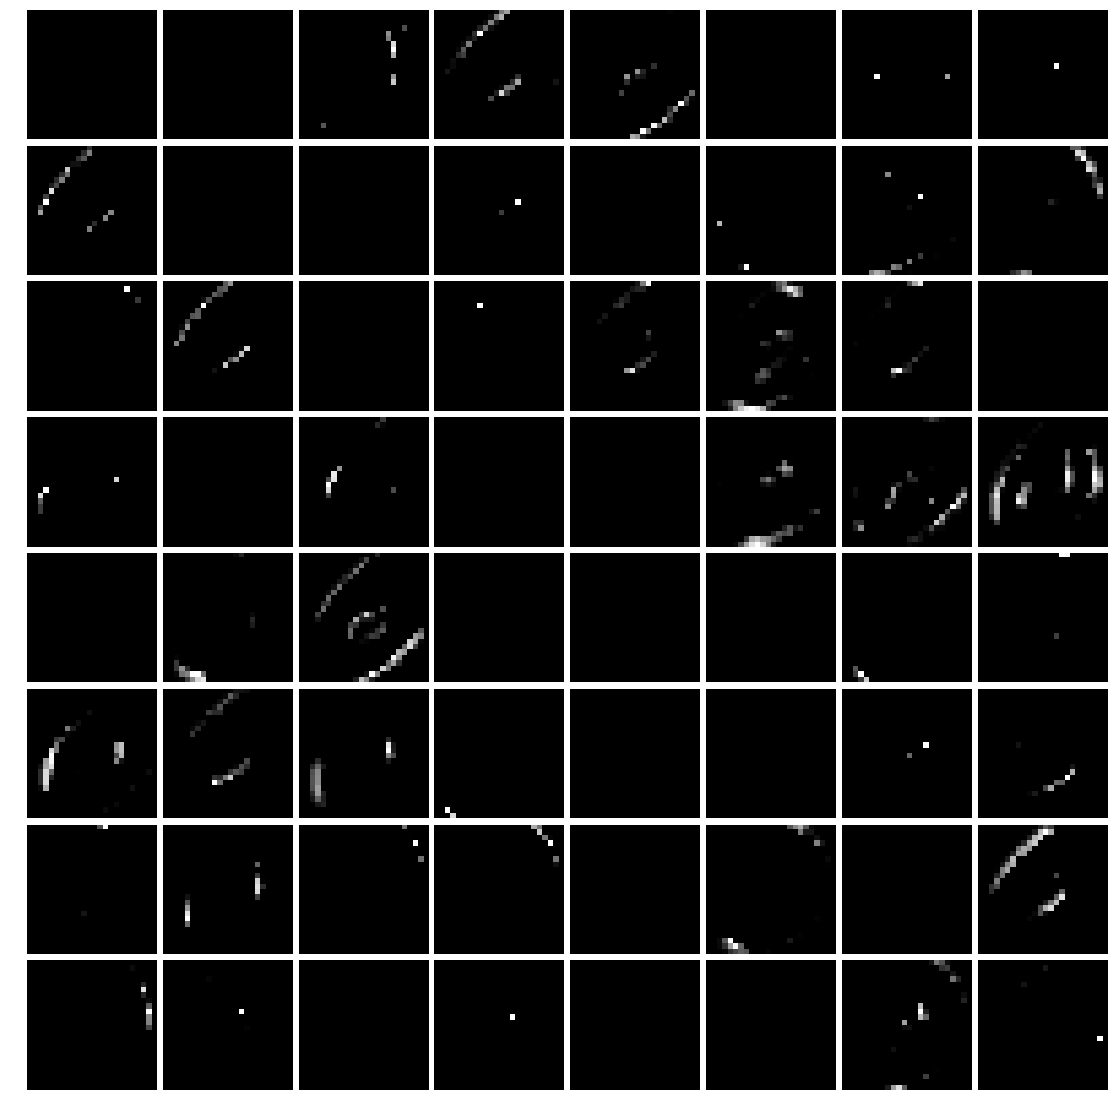

In [15]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 1 
for c in range(64):
    plt.subplot(8, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

### Classification of MNIST using Convolutional network with Keras

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

# import data
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)
# (60000, 28, 28) (10000, 28, 28)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # number of categories

def convolutional_model():    

    # create model
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model = convolutional_model()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 924,374
Trainable params: 924,374
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 49s - loss: 0.2398 - acc: 0.9289 - val_l

(?, 28, 28, 1) (60000, 24, 24, 64)


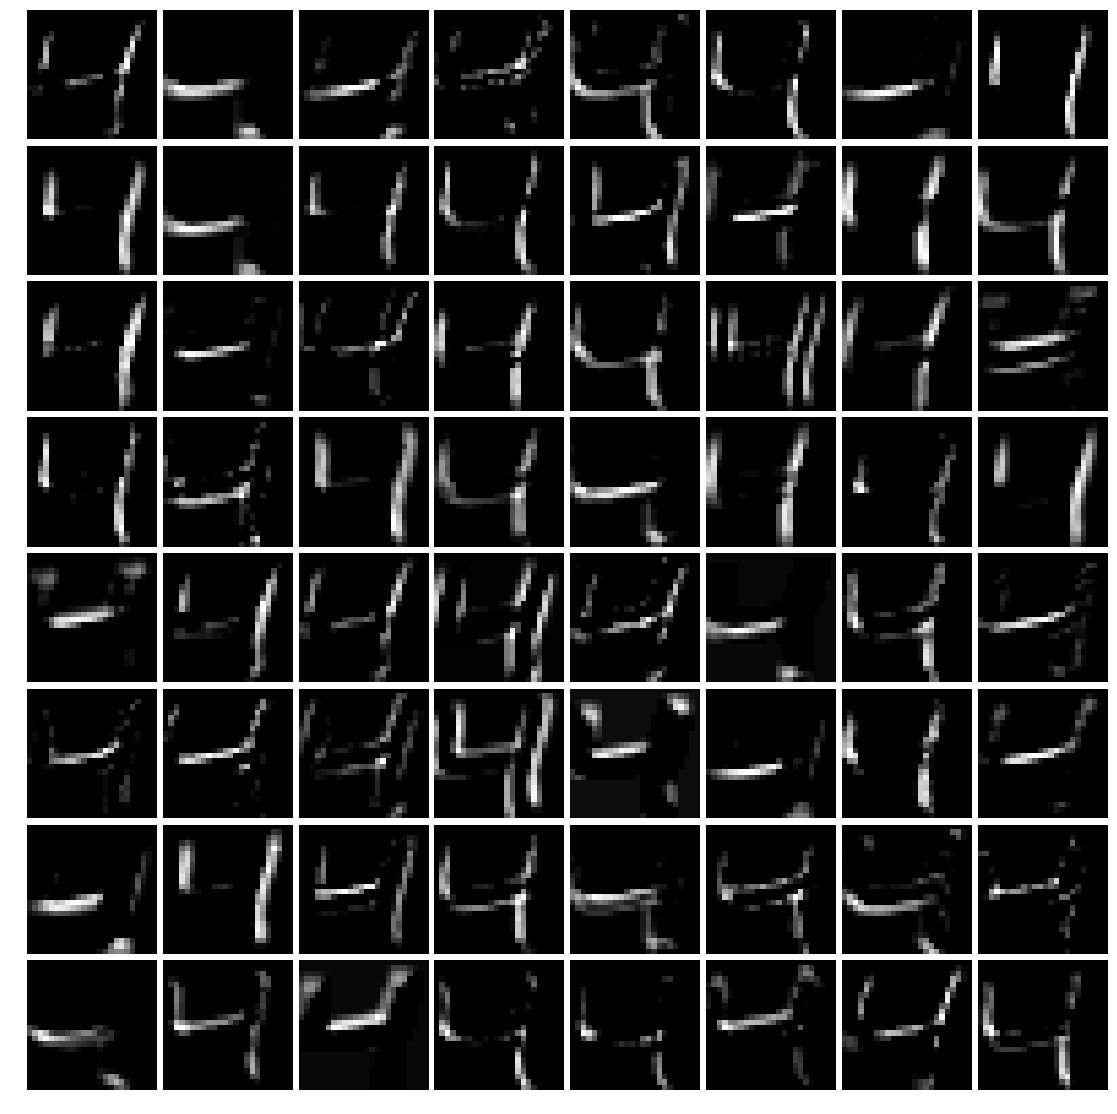

In [5]:
from keras.models import Model
import matplotlib.pylab as plt
import numpy as np
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 2 
for c in range(64):
    plt.subplot(8, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

### Classification of MNIST using FC network with Keras

Let's implement the handwritten digits classification with Keras, again using dense FC layers only. This time we shall use one more hidden layer, along with a dropout layer. The next code block shows how to implement the classifier with a few lines of code using the keras.models Sequential() function. We can simply add the layers sequentially to the model. There are a couple of hidden layers introduced, with each of them having 200 nodes along with a dropout in between, with 15% dropout rate. This time, let's use the Adam optimizer (which uses momentum to accelerate SGD). Let's fit the model on the training dataset with 10 epochs (one pass over the entire input dataset). As can be seen, with this simple change in the architecture, an accuracy of 98.04% is obtained on the test images of MNIST

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical

# import data
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)
# (60000, 28, 28) (10000, 28, 28)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1] # number of categories

def FC_model():    

    # create model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# build the model
model = FC_model()
model.summary()
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

(60000, 28, 28) (10000, 28, 28)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________

Let's visualize the architecture of the neural network we designed with Keras. The following code snippet will allow us to save the model (network) architecture in an image

In [ ]:
import pydot_ng as pydot
from keras.utils import plot_model
plot_model(model, to_file='model.png')

The following screenshot shows the output of the previous code block, the neural network architecture
<img src="../images/ch-10-7.png" >

**Visualizing the weights in the intermediate layers**                                                         
Now, let's visualize the weights learned in the intermediate layers. The following Python code visualizes the weights learned for the first 200 hidden units at the first dense layer

In [ ]:
from keras.models import Model
import matplotlib.pylab as plt
import numpy as np
W1 = model.get_layer('dense_7').get_weights()
W2 = model.get_layer('dense_8').get_weights()
W3 = model.get_layer('dense_9').get_weights()
print(W1[0].shape, W2[0].shape)
W = W1[0] @ W2[0] @ W3[0]
print(W.shape)
fig = plt.figure(figsize=(5,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.95, hspace=0.05, wspace=0.05) 
plt.gray()
for i in range(10):
    plt.subplot(4, 3, i+1), plt.imshow(np.reshape(W[:, i], (28,28))), plt.axis('off')
plt.suptitle('What NN sees', size=20)
plt.show()

In [2]:
#! pip install pydot
#! pip install pydot_ng graphviz
import pydot_ng as pydot
from keras.utils import plot_model
plot_model(model, to_file='../images/keras_model.png')

### Classifying Cat/Dog images using VGG-16 in Keras

* First download the compressed cats/dogs images train and test datasets from here: https://www.kaggle.com/c/dogs-vs-cats/data.
* Then unzip the train.zip file under the **train** folder (should contain all the 25k train images) and test.zip file under the **test** folder (should contain all the test images).

In [12]:
import os                 
import numpy as np        
import cv2                
from random import shuffle 
from tqdm import tqdm # percentage bar for tasks. 

# download the cats/dogs images compressed train and test datasets from here: https://www.kaggle.com/c/dogs-vs-cats/data
# unzip the train.zip images under the train folder and test.zip images under the test folder
train = './train'      
test = './test'
lr = 1e-6     # learning rate
image_size = 50 # all the images will be resized to squaure images with this dimension

model_name = 'cats_dogs-{}-{}.model'.format(lr, 'conv2') 

In [13]:
def label_image(image):
    word_label = image.split('.')[-3]
    if word_label == 'cat': return 0
    elif word_label == 'dog': return 1

In [14]:
def create_training_data():
    training_data = []
    for image in tqdm(os.listdir(train)):
        path = os.path.join(train, image)
        label = label_image(image)
        image = cv2.imread(path)
        image = cv2.resize(image, (image_size, image_size))
        training_data.append([np.array(image),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [15]:
def create_test_data():
    testing_data = []
    for image in tqdm(os.listdir(test)):
        path = os.path.join(test, image)
        image = cv2.imread(path)
        image = cv2.resize(image, (image_size, image_size))
        testing_data.append(np.array(image))        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [16]:
train_data = create_training_data()

100%|██████████████████████████████████████████████████████████████████| 25000/25000 [03:38<00:00, 114.62it/s]


In [18]:
len(train_data)
#train_data[0]

25000

In [29]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.utils import to_categorical

train = train_data[:-5000] # 20k images for training
valid = train_data[-5000:] # 5k images for validation
X_train = np.array([i[0] for i in train]).reshape(-1,image_size,image_size,3)
y_train = [i[1] for i in train]
y_train = to_categorical(y_train)
print(X_train.shape, y_train.shape)

X_valid = np.array([i[0] for i in valid]).reshape(-1,image_size,image_size,3)
y_valid = [i[1] for i in valid]
y_valid = to_categorical(y_valid) # to one-hot encoding

num_classes = y_valid.shape[1] # number of categories

model = VGG16(weights=None, input_shape=(image_size,image_size,3), classes=num_classes) # train VGG16 model from scratch
model.compile(Adam(lr=lr), "categorical_crossentropy", metrics=["accuracy"]) # "adam"
model.summary()

# fit the model, it's going take a long time if not run on GPU
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=256, verbose=2)
# evaluate the model
scores = model.evaluate(X_valid, y_valid, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

(20000, 50, 50, 3) (20000, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 12

In [24]:
from keras.models import Model
import matplotlib.pylab as plt
import numpy as np

intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('block1_conv2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

(?, 50, 50, 3) (20000, 50, 50, 64)


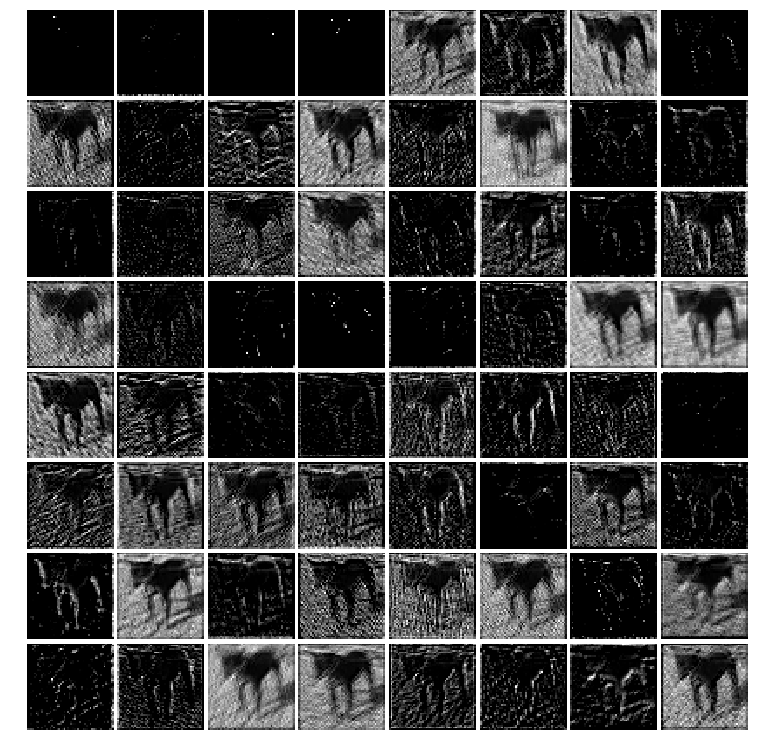

In [38]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('block1_conv2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 3
for c in range(64):
    plt.subplot(8, 8, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

In [25]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('block2_conv2').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

(?, 50, 50, 3) (20000, 25, 25, 128)


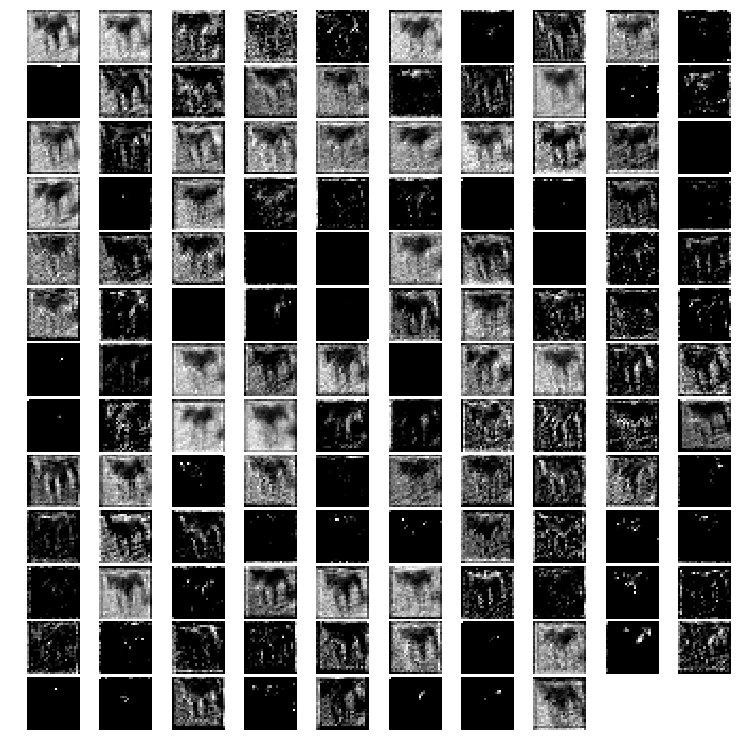

In [40]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 3
for c in range(128):
    plt.subplot(13, 10, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

In [41]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer('block3_conv3').output)
intermediate_output = intermediate_layer_model.predict(X_train)
print(model.input.shape, intermediate_output.shape)

(?, 50, 50, 3) (20000, 12, 12, 256)


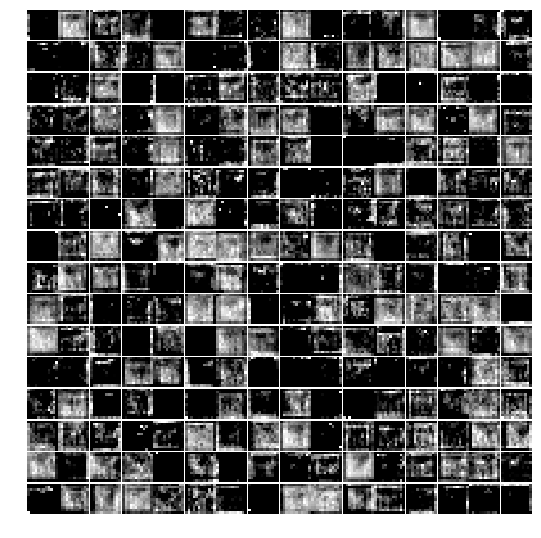

In [43]:
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
plt.gray()
i = 3
for c in range(256):
    plt.subplot(16, 16, c+1), plt.imshow(intermediate_output[i,:,:,c]), plt.axis('off')
plt.show()

In [26]:
test_data = create_test_data()
len(test_data) # only took a subset of the test data

100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 41.20it/s]


1000

In [32]:
X_test = np.array([i for i in test_data]).reshape(-1,image_size,image_size,3)
probs = model.predict(X_test)

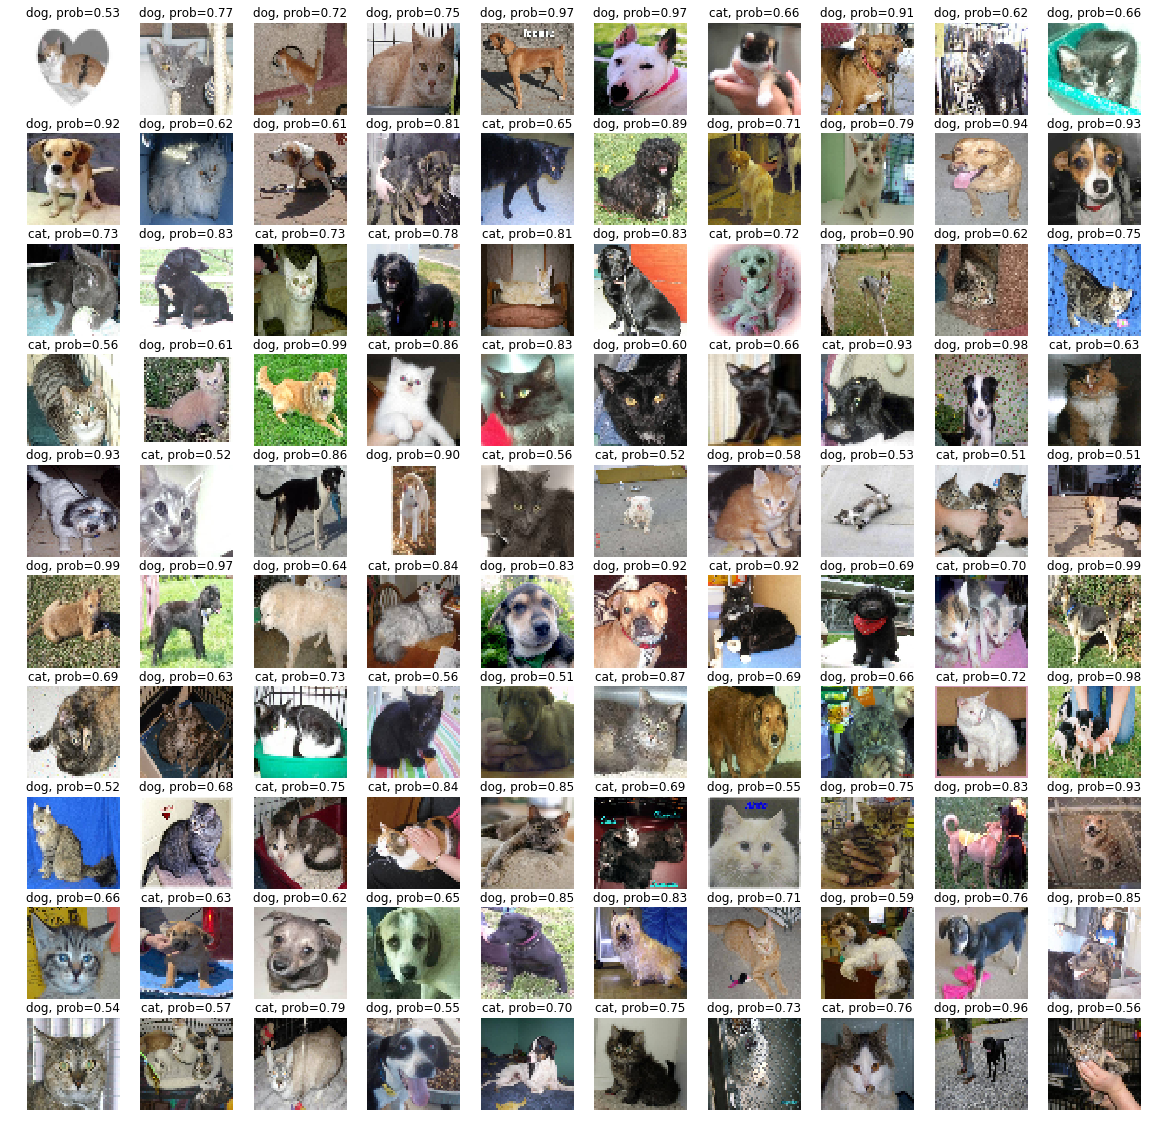

In [73]:
probs = np.round(probs,2)
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1), plt.imshow(X_test[i,:,:,::-1]), plt.axis('off')
    plt.title("{}, prob={:0.2f}".format('cat' if probs[i][1] < 0.5 else 'dog', max(probs[i][0],probs[i][1])))
plt.show()